**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 894.


In [3]:
#========================================================
#CALCULATING MILESTONE LIFETIME
#========================================================
total_iteration = w.niters

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink1 = 4.6

it_back = [0.0 for i in range(total_iteration)]
flux_back = 0.0
flux_back_array = []
sink2 = 2.7

lifetime = 0.0
force_eval = 0.0

count_forward = 0
count_backward = 0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    #print sum(wts)
    force_eval += (tau-1)*w.current.walkers*0.01
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink1 and l[j][tau-1] >= sink1:
            it[i] += wts[j]
            #print wts[j], 'forwd'
            count_forward += 1
            for k in range(tau):
                if l[j][k] < sink1 and l[j][k+1] >= sink1:
                    flux += wts[j]
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
                    
        if l[j][0] > sink2 and l[j][tau-1] <= sink2:
            #print l[j,0], l[j,tau-1]
            it_back[i] += wts[j]
            #print wts[j], 'backwd'
            count_backward += 1
            for k in range(tau):
                #print 'elmnts',l[j,k]
                if l[j][k-1][0] > sink2 and l[j][k][0] <= sink2:
                    flux_back += wts[j]
                    #print flux_back, 'fback'
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
    flux_array.append(flux)
    flux_back_array.append(flux_back)
flux = flux/(total_iteration*(tau-1))

print "MFPT = ", 1./flux     
print "MFPT_back = ", 1./flux_back
print "lifetime = ", lifetime
print "forward probability = ", sum(it)
print "backward probability = ", sum(it_back)

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability #forward count #backward count"
print >>f1, 1./flux, 1./flux_back, lifetime, sum(it), sum(it_back), count_forward, count_backward
f1.close()

Setting iteration to iter 1.
total simulation time =  0.5 ps
Setting iteration to iter 2.
total simulation time =  1.0 ps
Setting iteration to iter 3.
total simulation time =  2.5 ps
Setting iteration to iter 4.
total simulation time =  5.0 ps
Setting iteration to iter 5.
total simulation time =  7.5 ps
Setting iteration to iter 6.
total simulation time =  11.5 ps
Setting iteration to iter 7.
total simulation time =  15.5 ps
Setting iteration to iter 8.
total simulation time =  19.5 ps
Setting iteration to iter 9.
total simulation time =  25.0 ps
Setting iteration to iter 10.
total simulation time =  30.5 ps
Setting iteration to iter 11.
total simulation time =  36.0 ps
Setting iteration to iter 12.
total simulation time =  41.5 ps
Setting iteration to iter 13.
total simulation time =  47.0 ps
Setting iteration to iter 14.
total simulation time =  52.5 ps
Setting iteration to iter 15.
total simulation time =  58.0 ps
Setting iteration to iter 16.
total simulation time =  63.0 ps
Settin

total simulation time =  706.5 ps
Setting iteration to iter 137.
total simulation time =  711.5 ps
Setting iteration to iter 138.
total simulation time =  717.0 ps
Setting iteration to iter 139.
total simulation time =  722.5 ps
Setting iteration to iter 140.
total simulation time =  727.0 ps
Setting iteration to iter 141.
total simulation time =  732.5 ps
Setting iteration to iter 142.
total simulation time =  738.0 ps
Setting iteration to iter 143.
total simulation time =  743.5 ps
Setting iteration to iter 144.
total simulation time =  749.0 ps
Setting iteration to iter 145.
total simulation time =  754.5 ps
Setting iteration to iter 146.
total simulation time =  760.0 ps
Setting iteration to iter 147.
total simulation time =  765.5 ps
Setting iteration to iter 148.
total simulation time =  770.5 ps
Setting iteration to iter 149.
total simulation time =  775.0 ps
Setting iteration to iter 150.
total simulation time =  780.0 ps
Setting iteration to iter 151.
total simulation time =  

total simulation time =  1337.0 ps
Setting iteration to iter 266.
total simulation time =  1342.0 ps
Setting iteration to iter 267.
total simulation time =  1347.5 ps
Setting iteration to iter 268.
total simulation time =  1352.5 ps
Setting iteration to iter 269.
total simulation time =  1358.0 ps
Setting iteration to iter 270.
total simulation time =  1363.5 ps
Setting iteration to iter 271.
total simulation time =  1368.5 ps
Setting iteration to iter 272.
total simulation time =  1373.5 ps
Setting iteration to iter 273.
total simulation time =  1378.0 ps
Setting iteration to iter 274.
total simulation time =  1383.0 ps
Setting iteration to iter 275.
total simulation time =  1388.5 ps
Setting iteration to iter 276.
total simulation time =  1394.0 ps
Setting iteration to iter 277.
total simulation time =  1399.5 ps
Setting iteration to iter 278.
total simulation time =  1405.0 ps
Setting iteration to iter 279.
total simulation time =  1410.5 ps
Setting iteration to iter 280.
total simu

Setting iteration to iter 399.
total simulation time =  1980.5 ps
Setting iteration to iter 400.
total simulation time =  1986.0 ps
Setting iteration to iter 401.
total simulation time =  1991.0 ps
Setting iteration to iter 402.
total simulation time =  1995.0 ps
Setting iteration to iter 403.
total simulation time =  1999.5 ps
Setting iteration to iter 404.
total simulation time =  2004.0 ps
Setting iteration to iter 405.
total simulation time =  2008.5 ps
Setting iteration to iter 406.
total simulation time =  2014.0 ps
Setting iteration to iter 407.
total simulation time =  2019.5 ps
Setting iteration to iter 408.
total simulation time =  2025.0 ps
Setting iteration to iter 409.
total simulation time =  2030.5 ps
Setting iteration to iter 410.
total simulation time =  2036.0 ps
Setting iteration to iter 411.
total simulation time =  2041.0 ps
Setting iteration to iter 412.
total simulation time =  2046.0 ps
Setting iteration to iter 413.
total simulation time =  2051.5 ps
Setting it

total simulation time =  2632.5 ps
Setting iteration to iter 528.
total simulation time =  2638.0 ps
Setting iteration to iter 529.
total simulation time =  2643.5 ps
Setting iteration to iter 530.
total simulation time =  2649.0 ps
Setting iteration to iter 531.
total simulation time =  2654.5 ps
Setting iteration to iter 532.
total simulation time =  2660.0 ps
Setting iteration to iter 533.
total simulation time =  2665.5 ps
Setting iteration to iter 534.
total simulation time =  2671.0 ps
Setting iteration to iter 535.
total simulation time =  2676.5 ps
Setting iteration to iter 536.
total simulation time =  2681.5 ps
Setting iteration to iter 537.
total simulation time =  2687.0 ps
Setting iteration to iter 538.
total simulation time =  2692.5 ps
Setting iteration to iter 539.
total simulation time =  2698.0 ps
Setting iteration to iter 540.
total simulation time =  2703.5 ps
Setting iteration to iter 541.
total simulation time =  2709.0 ps
Setting iteration to iter 542.
total simu

total simulation time =  3301.0 ps
Setting iteration to iter 653.
total simulation time =  3306.0 ps
Setting iteration to iter 654.
total simulation time =  3311.5 ps
Setting iteration to iter 655.
total simulation time =  3317.0 ps
Setting iteration to iter 656.
total simulation time =  3322.5 ps
Setting iteration to iter 657.
total simulation time =  3328.0 ps
Setting iteration to iter 658.
total simulation time =  3333.0 ps
Setting iteration to iter 659.
total simulation time =  3338.5 ps
Setting iteration to iter 660.
total simulation time =  3344.0 ps
Setting iteration to iter 661.
total simulation time =  3349.5 ps
Setting iteration to iter 662.
total simulation time =  3354.5 ps
Setting iteration to iter 663.
total simulation time =  3360.0 ps
Setting iteration to iter 664.
total simulation time =  3365.5 ps
Setting iteration to iter 665.
total simulation time =  3371.0 ps
Setting iteration to iter 666.
total simulation time =  3376.0 ps
Setting iteration to iter 667.
total simu

total simulation time =  4004.5 ps
Setting iteration to iter 790.
total simulation time =  4009.5 ps
Setting iteration to iter 791.
total simulation time =  4014.5 ps
Setting iteration to iter 792.
total simulation time =  4020.0 ps
Setting iteration to iter 793.
total simulation time =  4025.5 ps
Setting iteration to iter 794.
total simulation time =  4031.0 ps
Setting iteration to iter 795.
total simulation time =  4036.5 ps
Setting iteration to iter 796.
total simulation time =  4041.5 ps
Setting iteration to iter 797.
total simulation time =  4046.5 ps
Setting iteration to iter 798.
total simulation time =  4052.0 ps
Setting iteration to iter 799.
total simulation time =  4057.5 ps
Setting iteration to iter 800.
total simulation time =  4063.0 ps
Setting iteration to iter 801.
total simulation time =  4068.0 ps
Setting iteration to iter 802.
total simulation time =  4073.5 ps
Setting iteration to iter 803.
total simulation time =  4078.5 ps
Setting iteration to iter 804.
total simu

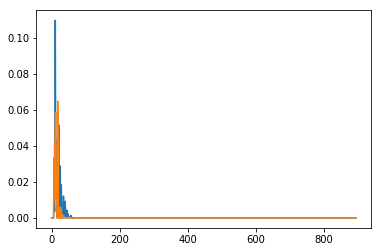

In [4]:
#Forward and backward first passage time distributions
plt.plot(it)
plt.plot(it_back)

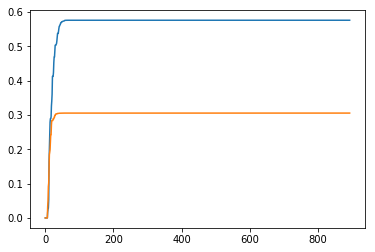

In [5]:
#check for convergence
plt.plot(flux_array)
plt.plot(flux_back_array)
f1 = open('flux.dat','w')
print >>f1, '#time #flux_forward #flux_backward'

for i in range(len(it)):
    print >>f1, i*(tau-1), flux_array[i], flux_back_array[i]
    
f1.close()

In [6]:
print it
f1 = open('FPTD_forward.dat','w')

for i in range(len(it)):
    print >>f1, i*(tau-1), it[i]
    
f1.close()


f2 = open('FPTD_back.dat','w')

for i in range(len(it)):
    print >>f2, i*(tau-1), it_back[i]
    
f2.close()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0172, 0.0080000000000000002, 0.0034833333333333335, 0.023703703703703703, 0.10988518518518518, 0.041777777777777782, 0.043359259259259264, 0.031481481481481485, 0.010450925925925926, 0.0, 0.0048750000000000009, 0.031919444444444445, 0.014588477366255145, 0.020111728395061729, 0.051725102880658437, 0.0, 0.0, 0.0118028463648834, 0.02886388888888889, 0.015665317786922726, 0.0, 0.018496519204389574, 0.01602528006401463, 0.0, 0.0, 0.0021265432098765431, 0.0028574759945130313, 0.0077966049382716049, 0.012117946959304984, 0.0095043895747599465, 0.0, 0.0, 0.0091406644947416536, 0.0061828037604362476, 0.0055671302731629662, 0.00081049777303595304, 0.0032116201544480001, 0.0010566860573422074, 0.0042267442293688296, 0.0013042978814205154, 0.0, 0.0024073621242104012, 0.0, 0.00066859844789920238, 0.0006445062426755745, 0.00034184345924571116, 0.00033429922394960119, 0.00017092172962285558, 0.00023342260127182508, 0.00037705434228352719, 0.0013212233068901156, 